# Week 2

#### Marketing and Commercial Strategy Analyst:
Which accommodation characteristics (amenities, capacity, and neighborhood rating) are most related to prices in each city?

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px

df = pd.read_csv(r"C:\Users\Griselda\Desktop\Bootcamp Data Analytics\Github\Projects\Business Simulator\Databases\week_2_df_tourist_python.csv", sep= ';')

df

apartment_id                                               name  \
0            11964                                 A ROOM WITH A VIEW   
1            21853                               Bright and airy room   
2            32347  Explore Cultural Sights from a Family-Friendly...   
3            35379                  Double 02 CasanovaRooms Barcelona   
4            35801                  Can Torras Farmhouse Studio Suite   
...            ...                                                ...   
7688      32392193                            Espectacular habitaci�n   
7689      32392774   ? Tu Hogar de Lujo ????? en el Centro de Sevilla   
7690      32395123                           Rooms by G Bella Mar�a 3   
7691      32407332           LUMINOSO Y ENCANTADOR PISO CERCA DE TODO   
7692      32423292   Apartament amb terrassa a 5 minuts de la platja.   

                                            description    host_id  \
0     Private bedroom in our attic apartment. Right ...      45553   
1     We have a quiet and sunny room with a good vie...      83531   
2     Open French doors and step onto a plant-filled...     139939   
3     Room at a my apartment. Kitchen and 2 bathroom...     152232   
4     Lay in bed & watch sunlight change the mood of...     153805   
...                                                 ...        ...   
7688                                                NaN  238089984   
7689  Exclusivo, amplio y luminoso alojamiento situa...  243246681   
7690  The 2-star Bella Maria has 24-hourreception an...  159933359   
7691  PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...  187631805   
7692  Apartament situat a Santa Margarita de Roses d...  158381471   

                   neighbourhood_name neighbourhood_district        room_type  \
0                              Centro                    NaN     Private room   
1                            C�rmenes                 Latina     Private room   
2                         San Vicente          Casco Antiguo  Entire home/apt   
3     l'Antiga Esquerra de l'Eixample               Eixample     Private room   
4                               Quart                    NaN     Private room   
...                               ...                    ...              ...   
7688                      Sant Antoni               Eixample     Private room   
7689                           Arenal          Casco Antiguo  Entire home/apt   
7690                         Felanitx                    NaN  Entire home/apt   
7691          Proven�als del Poblenou             Sant Mart�     Private room   
7692                            Roses                    NaN  Entire home/apt   

      accommodates  bathrooms  bedrooms  ...  review_scores_cleanliness  \
0                2        2.0       1.0  ...                      100.0   
1                1        1.0       1.0  ...                       90.0   
2                4        1.0       2.0  ...                      100.0   
3                2        2.0       1.0  ...                       90.0   
4                5        1.0       2.0  ...                      100.0   
...            ...        ...       ...  ...                        ...   
7688             1        1.0       1.0  ...                       90.0   
7689             6        2.0       3.0  ...                      100.0   
7690             2        1.0       1.0  ...                      100.0   
7691             3        2.0       2.0  ...                      100.0   
7692             4        2.0       1.0  ...                       90.0   

     review_scores_checkin  review_scores_communication  \
0                    100.0                        100.0   
1                    100.0                        100.0   
2                    100.0                        100.0   
3                    100.0                        100.0   
4                    100.0                        100.0   
...                    ...                          ...   
7

In [6]:
df["amstr"] =  df['amenities_list'].astype(str)
separador = df["amstr"].str.count(",") + 1
separador.name = "comoditats"
df_amenities = pd.concat([df, separador], axis=1)
df_amenities[["city","neighbourhood_name","accommodates","price","comoditats", "review_scores_rating"]]

city               neighbourhood_name  accommodates   price  \
0        malaga                           Centro             2   400.0   
1        madrid                         C�rmenes             1   170.0   
2       sevilla                      San Vicente             4   990.0   
3     barcelona  l'Antiga Esquerra de l'Eixample             2   400.0   
4        girona                            Quart             5   900.0   
...         ...                              ...           ...     ...   
7688  barcelona                      Sant Antoni             1  3000.0   
7689    sevilla                           Arenal             6  2090.0   
7690   mallorca                         Felanitx             2   930.0   
7691  barcelona          Proven�als del Poblenou             3   960.0   
7692     girona                            Roses             4   500.0   

      comoditats  review_scores_rating  
0             19                  97.0  
1             31                  92.0  
2             34                  98.0  
3             27                  94.0  
4             43                  97.0  
...          ...                   ...  
7688          12                  94.0  
7689          27                 100.0  
7690           9                  96.0  
7691          30                  98.0  
7692           7                  93.0  

[7693 rows x 6 columns]

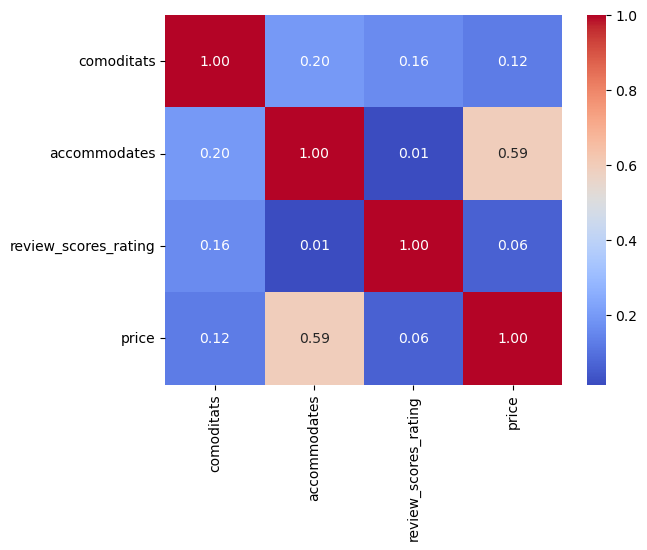

In [7]:
tcorr = df_amenities[['comoditats', 'accommodates', 'review_scores_rating', 'price']]
corre = tcorr.corr()
sns.heatmap(corre, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [9]:
# Variables of interest
variables = ["comoditats", "accommodates", "review_scores_rating"]

# Dictionari to save the coefficients per city
coef_dict = {}

for city in df_amenities["city"].unique():
    df_city = df_amenities[df_amenities["city"] == city]
    X = df_city[variables]
    y = df_city["price"]
    model = LinearRegression()
    model.fit(X, y)
    coef_dict[city] = model.coef_

# Convert to df for a better visualization
coef_df = pd.DataFrame(coef_dict, index=variables).T
coef_df.index.name = "city"
coef_df.reset_index(inplace=True)
print(coef_df)

        city  comoditats  accommodates  review_scores_rating
0     malaga   -1.939746    119.896710              9.495328
1     madrid    0.174631    158.945914              4.696413
2    sevilla  -10.590584    161.142812              2.819347
3  barcelona    4.206476    198.740101              1.728008
4     girona   -1.305960    181.173952              6.110821
5   valencia   -5.203859    134.966354              8.262263
6   mallorca    0.431811    161.181196              7.115337
7    menorca   -1.689679    238.252356              4.634617


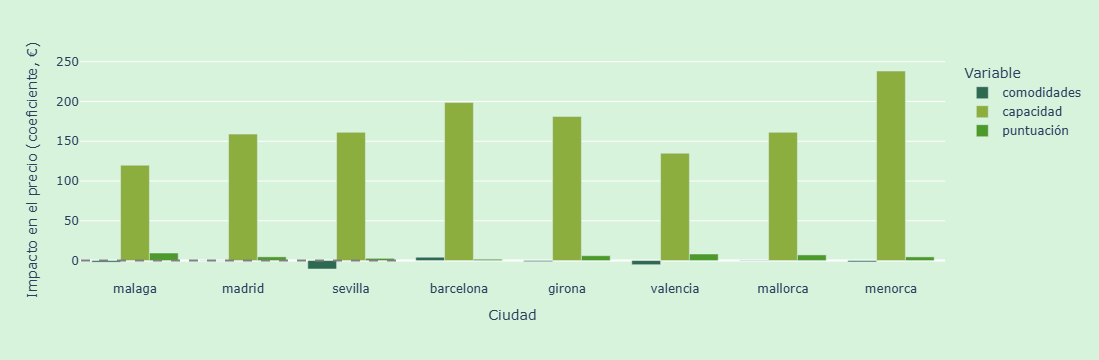

In [12]:
# Plotly format
coef_long = coef_df.melt(id_vars='city', var_name='Variable', value_name='Impacte')

# Rename
rename_dict = {
    'comoditats': 'comodidades',
    'accommodates': 'capacidad',
    'review_scores_rating': 'puntuación'
}
coef_long['Variable'] = coef_long['Variable'].replace(rename_dict)

colors = {
    'comodidades': '#2D6A4F', 'capacidad': '#8BAE3F', 'puntuación': '#4C9A2A'}

# Clustered Barchart
fig = px.bar(coef_long, x='city', y='Impacte', color='Variable', color_discrete_map=colors, barmode='group')

# Change of colors
fig.update_layout(
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC',
    yaxis_title='Impacto en el precio (coeficiente, €)',
    xaxis_title='Ciudad',
    legend_title_text='Variable'
)

fig.show()

# Week 3

#### Marketing and Commercial Strategy Analyst:
Which cities and neighborhoods show the greatest optimization potential, considering reviews, neighborhood rating, and minimum/maximum night availability?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv(r"C:\Users\Griselda\Desktop\Bootcamp Data Analytics\Github\Projects\Business Simulator\Databases\week_3_df_tourist_python.csv", sep= ';')
df

apartment_id                                               name  \
0            11964                                 A ROOM WITH A VIEW   
1            21853                               Bright and airy room   
2            32347  Explore Cultural Sights from a Family-Friendly...   
3            35379                  Double 02 CasanovaRooms Barcelona   
4            35801                  Can Torras Farmhouse Studio Suite   
...            ...                                                ...   
9645      47710189  Beautiful house in the centre in Santa Cristin...   
9646      47752964        Costa Brava - Palafrugell - playa y monta�a   
9647      47792016  MODERN AND BRIGHT NEW FLAT IN THE CENTER OF PA...   
9648      47884481                    MIT House Olavide III in Madrid   
9649      48061552                               Gran v�a Double Room   

                                            description    host_id  \
0     Private bedroom in our attic apartment. Right ...      45553   
1     We have a quiet and sunny room with a good vie...      83531   
2     Open French doors and step onto a plant-filled...     139939   
3     Room at a my apartment. Kitchen and 2 bathroom...     152232   
4     Lay in bed & watch sunlight change the mood of...     153805   
...                                                 ...        ...   
9645  Beautiful house in the center of Santa Cristin...  263841355   
9646  Piso con acceso directo a piscina. Lugar muy t...  282214688   
9647  Modern and new apartment in the old town of Pa...  263841355   
9648  The apartment is in a characteristic building ...  377605855   
9649                                                NaN  387478257   

                   neighbourhood_name neighbourhood_district        room_type  \
0                              Centro                    NaN     Private room   
1                            C�rmenes                 Latina     Private room   
2                         San Vicente          Casco Antiguo  Entire home/apt   
3     l'Antiga Esquerra de l'Eixample               Eixample     Private room   
4                               Quart                    NaN     Private room   
...                               ...                    ...              ...   
9645             Santa Cristina d'Aro                    NaN  Entire home/apt   
9646                      Palafrugell                    NaN  Entire home/apt   
9647                          Palam�s                    NaN  Entire home/apt   
9648                        Trafalgar               Chamber�  Entire home/apt   
9649                      Universidad                 Centro     Private room   

      accommodates  bathrooms  bedrooms  ...  review_scores_cleanliness  \
0                2        2.0       1.0  ...                      100.0   
1                1        1.0       1.0  ...                       90.0   
2                4        1.0       2.0  ...                      100.0   
3                2        2.0       1.0  ...                       90.0   
4                5        1.0       2.0  ...                      100.0   
...            ...        ...       ...  ...                        ...   
9645             8        2.0       4.0  ...                      100.0   
9646             7        2.0       3.0  ...                      100.0   
9647             6        1.0       3.0  ...                      100.0   
9648             4        1.0       1.0  ...                      100.0   
9649             2        2.0       1.0  ...                      100.0   

     review_scores_checkin  review_scores_communication  \
0                    100.0                        100.0   
1                    100.0                        100.0   
2                    100.0                        100.0   
3                    100.0                        100.0   
4                    100.0                        100.0   
...                    ...                          ...   
9

In [15]:
# >= 10 reviews
df_tru = df[df["number_of_reviews"] >= 10]

# global average score rating
mitjana_global = df["review_scores_rating"].mean()

# keep those with a rating < mean
df_tru = df_tru[df_tru["review_scores_rating"] < mitjana_global]

# New table with the columns neede it
recompte = df_tru.groupby(["city", "neighbourhood_name"]).agg({
    "neighbourhood_name": "count",
    "minimum_nights": "mean",
    "maximum_nights": "mean",
    "review_scores_rating": "mean",
    "number_of_reviews" : "mean"
}).rename(columns={
    "neighbourhood_name": "num_apartaments",
    "review_scores_rating": "mitjana_rating"
}).reset_index()

# Round averages
recompte[["minimum_nights", "maximum_nights", "mitjana_rating", "number_of_reviews"]] = recompte[["minimum_nights", "maximum_nights", "mitjana_rating", "number_of_reviews"]].round(2)

# nigyhborhoods with > 5 apartments
recompte = recompte[recompte["num_apartaments"] > 5]

recompte

city                     neighbourhood_name  num_apartaments  \
3    barcelona                            Hostafrancs               12   
9    barcelona                            Sant Antoni               37   
14   barcelona  Sant Pere, Santa Caterina i la Ribera               34   
15   barcelona                                  Sants                9   
22   barcelona                         el Barri G�tic               42   
23   barcelona                  el Bes�s i el Maresme               13   
24   barcelona     el Camp d'en Grassot i Gr�cia Nova               10   
25   barcelona             el Camp de l'Arpa del Clot               12   
26   barcelona                              el Carmel               10   
27   barcelona                                el Clot                6   
29   barcelona                          el Fort Pienc               28   
30   barcelona                            el Guinard�                6   
31   barcelona      el Parc i la Llacuna del Poblenou               12   
32   barcelona                           el Poble Sec               31   
33   barcelona                            el Poblenou               15   
35   barcelona                               el Raval               54   
36   barcelona        l'Antiga Esquerra de l'Eixample               44   
37   barcelona                         la Barceloneta               11   
39   barcelona                 la Dreta de l'Eixample               58   
40   barcelona                  la Font de la Guatlla                6   
45   barcelona         la Nova Esquerra de l'Eixample               34   
47   barcelona                     la Sagrada Fam�lia               31   
53   barcelona                      la Vila de Gr�cia               26   
62      girona                               Cadaqu�s                7   
65      girona                    Castell� d'Emp�ries                7   
70      girona                                 Girona               12   
75      girona                          Lloret de Mar                7   
85      girona                                  Roses               14   
96      girona                           Tossa de Mar                9   
118     madrid                                 Cortes               24   
121     madrid                               Delicias                7   
122     madrid                            Embajadores               55   
127     madrid                             Guindalera                6   
132     madrid                               Justicia               21   
141     madrid                                Palacio               29   
144     madrid                        Palos de Moguer               12   
156     madrid                              San Diego               10   
159     madrid                                    Sol               38   
161     madrid                            Universidad               40   
169     malaga                     Carretera de Cadiz               10   
170     malaga                                 Centro               64   
173     malaga                                   Este                7   
176   mallorca                                Alc�dia               10   
189   mallorca                      Palma de Mallorca               47   
200    menorca                  Ciutadella de Menorca               14   
205    sevilla                                Alfalfa                9   
210    sevilla                    Encarnaci�n, Regina               11   
211    sevilla                                  Feria                8   
219    sevilla                          San Bartolom�                7   
238   valencia                    CABANYAL-CANYAMELAR                8   
247   valencia                              EL MERCAT                9   
255   valencia                          LA MALVA-ROSA                8   
266   valencia                                RUSSAFA                8   
267   valencia

In [16]:
recompte["potencial_optimizacion"] = (
    (1 / (recompte["maximum_nights"] + 1)) * 0.1 +
    ((recompte["minimum_nights"] /10 )) * 0.2 +
    ((100 - recompte['mitjana_rating']) * (1 / (recompte['number_of_reviews'] + 1))) * 0.7) 

recompte
recompte.sort_values("potencial_optimizacion", ascending=False).head(10)

city     neighbourhood_name  num_apartaments  minimum_nights  \
247   valencia              EL MERCAT                9           10.78   
26   barcelona              el Carmel               10            2.00   
200    menorca  Ciutadella de Menorca               14            3.93   
27   barcelona                el Clot                6            1.83   
85      girona                  Roses               14            2.14   
37   barcelona         la Barceloneta               11            7.09   
96      girona           Tossa de Mar                9            2.33   
176   mallorca                Alc�dia               10            3.70   
65      girona    Castell� d'Emp�ries                7            2.29   
75      girona          Lloret de Mar                7            1.43   

     maximum_nights  mitjana_rating  number_of_reviews  potencial_optimizacion  
247          886.56           86.11              45.00                0.427082  
26           853.70           83.50              30.90                0.402186  
200          669.57           88.00              25.50                0.395730  
27           569.17           87.17              24.67                0.386639  
85           521.64           85.29              29.71                0.378289  
37           924.45           89.36              30.73                0.376639  
96           769.89           88.89              25.44                0.340867  
176          439.40           89.70              28.30                0.320302  
65           669.57           89.86              25.14                0.317487  
75           965.29           87.86              28.57                0.316089

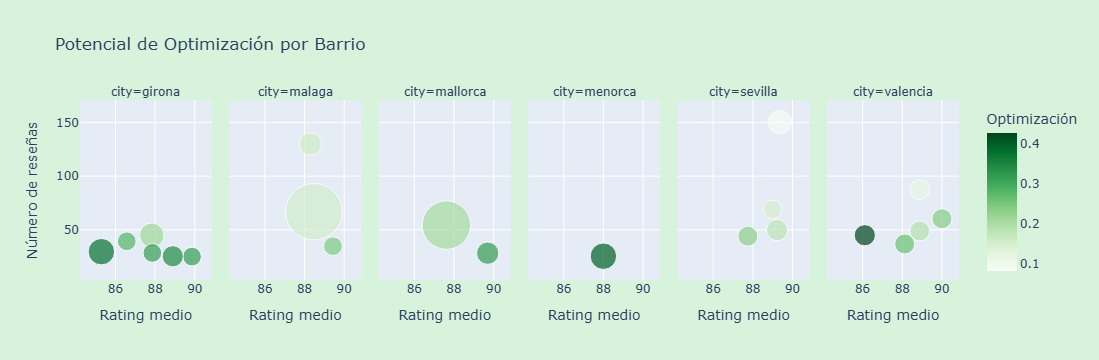

In [18]:
others = recompte[recompte["city"].isin(["girona", "valencia", "malaga", "menorca", "mallorca", "sevilla"])]

fig = px.scatter(others,
x="mitjana_rating",
y="number_of_reviews",
size="num_apartaments",
color="potencial_optimizacion",
color_continuous_scale="Greens",
hover_name="neighbourhood_name",
facet_col="city",
title="Potencial de Optimización por Barrio",
labels={
    "mitjana_rating": "Rating medio",
    "number_of_reviews": "Número de reseñas",
    "num_apartaments": "Número de apartamentos",
    "potencial_optimizacion": "Optimización"
},
size_max=40
)
fig.update_layout(
    # plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC')
fig.show()

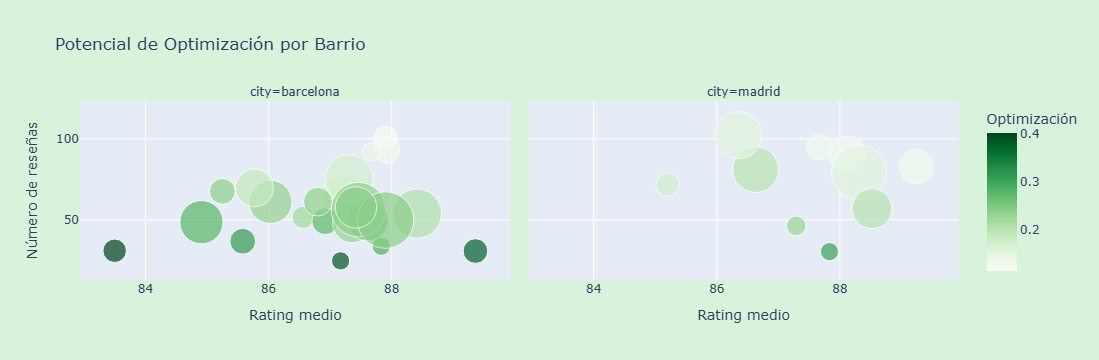

In [19]:
bcn_mad = recompte[(recompte["city"] == "barcelona") | (recompte["city"] == "madrid")]

fig = px.scatter(bcn_mad,
x="mitjana_rating",
y="number_of_reviews",
size="num_apartaments",
color="potencial_optimizacion",
color_continuous_scale="Greens",
hover_name="neighbourhood_name",
facet_col="city",
title="Potencial de Optimización por Barrio",
labels={
    "mitjana_rating": "Rating medio",
    "number_of_reviews": "Número de reseñas",
    "num_apartaments": "Número de apartamentos",
    "potencial_optimizacion": "Optimización"
},
size_max=40
)
fig.update_layout(
    # plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC')

fig.show()

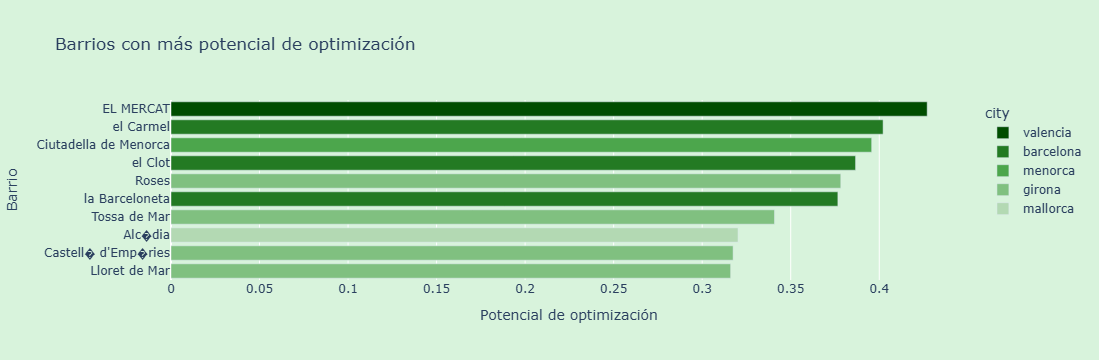

In [22]:
top_neighb = recompte.sort_values("potencial_optimizacion", ascending=False).head(10)

# Extract unique cities from top_neighb
unique_cities = top_neighb['city'].unique()

green_palette = [
    "#004d00", 
    "#237a23",
    "#4ca64c",
    "#80c080",
    "#b3d9b3",
    "#d6f5d6",
    "#99cc99",
    "#66b366",
    "#339933",
    "#1a801a"
]

# Assign a color to each city
color_map = {city: green_palette[i] for i, city in enumerate(unique_cities)}

fig = px.bar(
    top_neighb,
    x="potencial_optimizacion",
    y="neighbourhood_name",
    color="city",
    category_orders={"neighbourhood_name": top_neighb['neighbourhood_name'].tolist()},  # preserve descending order
    color_discrete_map=color_map,
    orientation='h',
    title="Barrios con más potencial de optimización",
    labels={"potencial_optimizacion": "Potencial de optimización", "neighbourhood_name": "Barrio"},
)

fig.update_layout(
    plot_bgcolor='#D8F3DC',
    paper_bgcolor='#D8F3DC')

fig.show()

# Week 4

##### Is it necessary to adjust our offers to the traveler profile and the demand for overnight stays in the cities where we operate, considering the official figures on origin, months of visit, and average number of overnight stays per autonomous city?

(my part of the job was to analyze the month of visit)


In [31]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Griselda\Desktop\Bootcamp Data Analytics\Github\Projects\Business Simulator\Databases\week_4_df_months.csv", sep= ';', dtype={2: str})
df
#Prepare the file to export it and work with it in Power BI

Totales Territoriales Comunidades y Ciudades Autónomas Provincias  \
0             Total Nacional                              NaN        NaN   
1             Total Nacional                              NaN        NaN   
2             Total Nacional                              NaN        NaN   
3             Total Nacional                              NaN        NaN   
4             Total Nacional                              NaN        NaN   
...                      ...                              ...        ...   
132715        Total Nacional                       19 Melilla        NaN   
132716        Total Nacional                       19 Melilla        NaN   
132717        Total Nacional                       19 Melilla        NaN   
132718        Total Nacional                       19 Melilla        NaN   
132719        Total Nacional                       19 Melilla        NaN   

       Viajeros y pernoctaciones Residencia: Nivel 1  \
0                        Viajero               Total   
1                        Viajero               Total   
2                        Viajero               Total   
3                        Viajero               Total   
4                        Viajero               Total   
...                          ...                 ...   
132715            Pernoctaciones               Total   
132716            Pernoctaciones               Total   
132717            Pernoctaciones               Total   
132718            Pernoctaciones               Total   
132719            Pernoctaciones               Total   

                Residencia: Nivel 2  Periodo       Total  
0                               NaN  2025M04  10.018.537  
1                               NaN  2025M03   7.680.722  
2                               NaN  2025M02   6.539.960  
3                               NaN  2025M01   5.776.075  
4                               NaN  2024M12   6.553.489  
...                             ...      ...         ...  
132715  Residentes en el Extranjero  1999M05       1.305  
132716  Residentes en el Extranjero  1999M04       1.668  
132717  Residentes en el Extranjero  1999M03       1.673  
132718  Residentes en el Extranjero  1999M02       1.487  
132719  Residentes en el Extranjero  1999M01       1.148  

[132720 rows x 8 columns]

In [32]:
#remove the "pernoctaciones" rows as we are only working with travelers (viajeros)
df = df[df['Viajeros y pernoctaciones'].str.lower() != 'pernoctaciones']
df

Totales Territoriales Comunidades y Ciudades Autónomas Provincias  \
0             Total Nacional                              NaN        NaN   
1             Total Nacional                              NaN        NaN   
2             Total Nacional                              NaN        NaN   
3             Total Nacional                              NaN        NaN   
4             Total Nacional                              NaN        NaN   
...                      ...                              ...        ...   
131767        Total Nacional                       19 Melilla        NaN   
131768        Total Nacional                       19 Melilla        NaN   
131769        Total Nacional                       19 Melilla        NaN   
131770        Total Nacional                       19 Melilla        NaN   
131771        Total Nacional                       19 Melilla        NaN   

       Viajeros y pernoctaciones Residencia: Nivel 1  \
0                        Viajero               Total   
1                        Viajero               Total   
2                        Viajero               Total   
3                        Viajero               Total   
4                        Viajero               Total   
...                          ...                 ...   
131767                   Viajero               Total   
131768                   Viajero               Total   
131769                   Viajero               Total   
131770                   Viajero               Total   
131771                   Viajero               Total   

                Residencia: Nivel 2  Periodo       Total  
0                               NaN  2025M04  10.018.537  
1                               NaN  2025M03   7.680.722  
2                               NaN  2025M02   6.539.960  
3                               NaN  2025M01   5.776.075  
4                               NaN  2024M12   6.553.489  
...                             ...      ...         ...  
131767  Residentes en el Extranjero  1999M05         474  
131768  Residentes en el Extranjero  1999M04         562  
131769  Residentes en el Extranjero  1999M03         618  
131770  Residentes en el Extranjero  1999M02         729  
131771  Residentes en el Extranjero  1999M01         329  

[66360 rows x 8 columns]

In [33]:
#Drop innecessary columns
df = df[df['Residencia: Nivel 2'].isna()]
df = df.drop(columns=['Residencia: Nivel 2'])
df = df.drop(columns=['Residencia: Nivel 1'])
df

Totales Territoriales Comunidades y Ciudades Autónomas Provincias  \
0             Total Nacional                              NaN        NaN   
1             Total Nacional                              NaN        NaN   
2             Total Nacional                              NaN        NaN   
3             Total Nacional                              NaN        NaN   
4             Total Nacional                              NaN        NaN   
...                      ...                              ...        ...   
131135        Total Nacional                       19 Melilla        NaN   
131136        Total Nacional                       19 Melilla        NaN   
131137        Total Nacional                       19 Melilla        NaN   
131138        Total Nacional                       19 Melilla        NaN   
131139        Total Nacional                       19 Melilla        NaN   

       Viajeros y pernoctaciones  Periodo       Total  
0                        Viajero  2025M04  10.018.537  
1                        Viajero  2025M03   7.680.722  
2                        Viajero  2025M02   6.539.960  
3                        Viajero  2025M01   5.776.075  
4                        Viajero  2024M12   6.553.489  
...                          ...      ...         ...  
131135                   Viajero  1999M05       3.341  
131136                   Viajero  1999M04       2.457  
131137                   Viajero  1999M03       2.773  
131138                   Viajero  1999M02       2.917  
131139                   Viajero  1999M01       1.650  

[22120 rows x 6 columns]

In [34]:
df['Año'] = df['Periodo'].str.extract(r'(\d{4})').astype(int)
df['Mes'] = df['Periodo'].str.extract(r'M(\d{2})').astype(int)
mesos = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Create a new column with the month name
df['Nom_mes'] = df['Mes'].map(mesos)
df

Totales Territoriales Comunidades y Ciudades Autónomas Provincias  \
0             Total Nacional                              NaN        NaN   
1             Total Nacional                              NaN        NaN   
2             Total Nacional                              NaN        NaN   
3             Total Nacional                              NaN        NaN   
4             Total Nacional                              NaN        NaN   
...                      ...                              ...        ...   
131135        Total Nacional                       19 Melilla        NaN   
131136        Total Nacional                       19 Melilla        NaN   
131137        Total Nacional                       19 Melilla        NaN   
131138        Total Nacional                       19 Melilla        NaN   
131139        Total Nacional                       19 Melilla        NaN   

       Viajeros y pernoctaciones  Periodo       Total   Año  Mes    Nom_mes  
0                        Viajero  2025M04  10.018.537  2025    4      Abril  
1                        Viajero  2025M03   7.680.722  2025    3      Marzo  
2                        Viajero  2025M02   6.539.960  2025    2    Febrero  
3                        Viajero  2025M01   5.776.075  2025    1      Enero  
4                        Viajero  2024M12   6.553.489  2024   12  Diciembre  
...                          ...      ...         ...   ...  ...        ...  
131135                   Viajero  1999M05       3.341  1999    5       Mayo  
131136                   Viajero  1999M04       2.457  1999    4      Abril  
131137                   Viajero  1999M03       2.773  1999    3      Marzo  
131138                   Viajero  1999M02       2.917  1999    2    Febrero  
131139                   Viajero  1999M01       1.650  1999    1      Enero  

[22120 rows x 9 columns]

In [35]:
# Only need the years from 2013
df = df[df['Año'] >= 2013]
df

Totales Territoriales Comunidades y Ciudades Autónomas Provincias  \
0             Total Nacional                              NaN        NaN   
1             Total Nacional                              NaN        NaN   
2             Total Nacional                              NaN        NaN   
3             Total Nacional                              NaN        NaN   
4             Total Nacional                              NaN        NaN   
...                      ...                              ...        ...   
130967        Total Nacional                       19 Melilla        NaN   
130968        Total Nacional                       19 Melilla        NaN   
130969        Total Nacional                       19 Melilla        NaN   
130970        Total Nacional                       19 Melilla        NaN   
130971        Total Nacional                       19 Melilla        NaN   

       Viajeros y pernoctaciones  Periodo       Total   Año  Mes    Nom_mes  
0                        Viajero  2025M04  10.018.537  2025    4      Abril  
1                        Viajero  2025M03   7.680.722  2025    3      Marzo  
2                        Viajero  2025M02   6.539.960  2025    2    Febrero  
3                        Viajero  2025M01   5.776.075  2025    1      Enero  
4                        Viajero  2024M12   6.553.489  2024   12  Diciembre  
...                          ...      ...         ...   ...  ...        ...  
130967                   Viajero  2013M05       4.160  2013    5       Mayo  
130968                   Viajero  2013M04       3.898  2013    4      Abril  
130969                   Viajero  2013M03       3.559  2013    3      Marzo  
130970                   Viajero  2013M02       3.269  2013    2    Febrero  
130971                   Viajero  2013M01       3.354  2013    1      Enero  

[10360 rows x 9 columns]

In [37]:
# Export it to csv to work in Power BI
df.to_csv(r"C:\Users\Griselda\Desktop\Bootcamp Data Analytics\Github\Projects\Business Simulator\Databases\week_4_df_months_clean.csv")